# Load Module

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Load Data

In [3]:
train_df = pd.read_csv('/kaggle/input/analyzing-student-academic-trends/student_exam_scores.csv')

# Data Overview

In [4]:
train_df.head()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    object 
 1   hours_studied       200 non-null    float64
 2   sleep_hours         200 non-null    float64
 3   attendance_percent  200 non-null    float64
 4   previous_scores     200 non-null    int64  
 5   exam_score          200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [5]:
train_df.describe()
#train_df.isna().sum()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.325500,6.622000,74.830000,66.800000,33.955000
std,3.227317,1.497138,14.249905,15.663869,6.789548
min,1.000000,4.000000,50.300000,40.000000,17.100000
25%,3.500000,5.300000,62.200000,54.000000,29.500000
50%,6.150000,6.700000,75.250000,67.500000,34.050000
75%,9.000000,8.025000,87.425000,80.000000,38.750000
max,12.000000,9.000000,100.000000,95.000000,51.300000


# EDA & Visualize

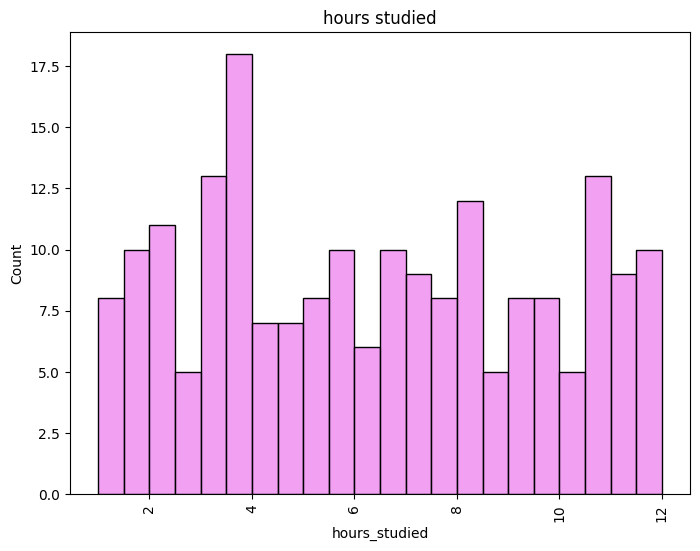

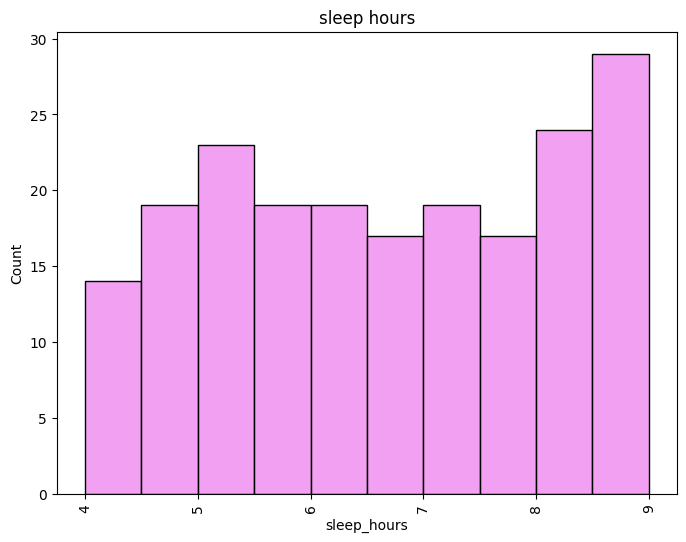

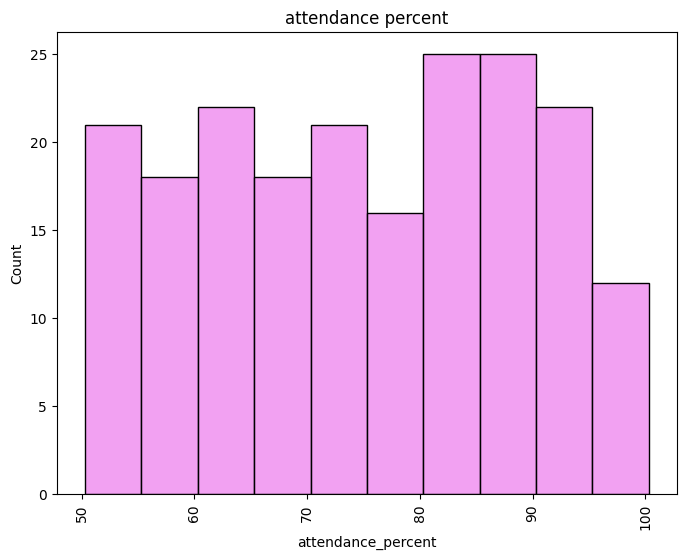

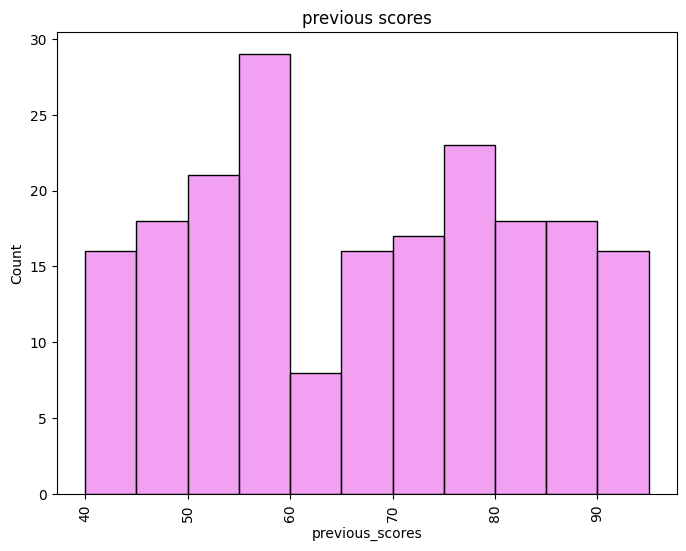

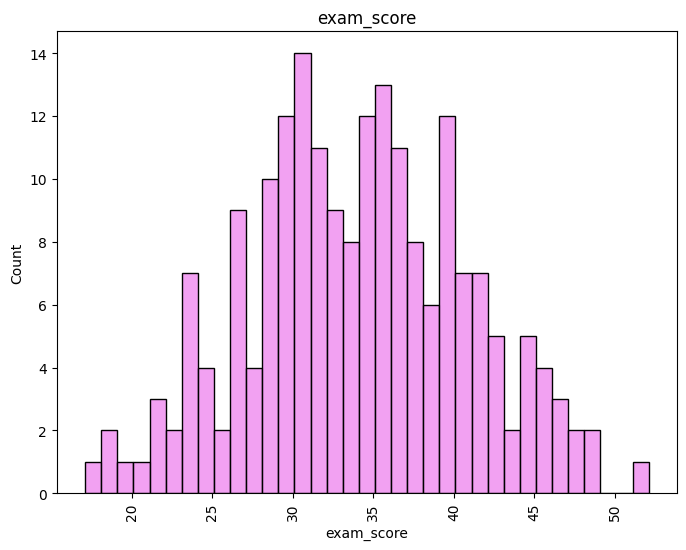

In [6]:
# Univariate analysis

# hours_studied
plt.figure(figsize=(8,6))
sns.histplot(train_df["hours_studied"], binwidth=0.5, bins=12, color="violet")
plt.title("hours studied")
plt.xticks(rotation=90)
plt.show()

# sleep_hours
plt.figure(figsize=(8,6))
sns.histplot(train_df["sleep_hours"], binwidth=0.5, bins=10, color="violet")
plt.title("sleep hours")
plt.xticks(rotation=90)
plt.show()

# attendance_percent
plt.figure(figsize=(8,6))
sns.histplot(train_df["attendance_percent"], binwidth=5, bins=10, color="violet")
plt.title("attendance percent")
plt.xticks(rotation=90)
plt.show()

# previous_scores
plt.figure(figsize=(8,6))
sns.histplot(train_df["previous_scores"], binwidth=5, color="violet")
plt.title("previous scores")
plt.xticks(rotation=90)
plt.show()

# exam_score
plt.figure(figsize=(8,6))
sns.histplot(train_df["exam_score"], binwidth=1, color="violet")
plt.title("exam_score")
plt.xticks(rotation=90)
plt.show()

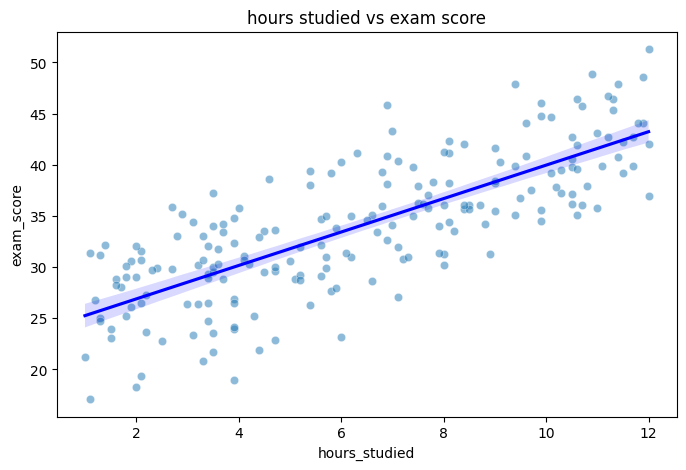

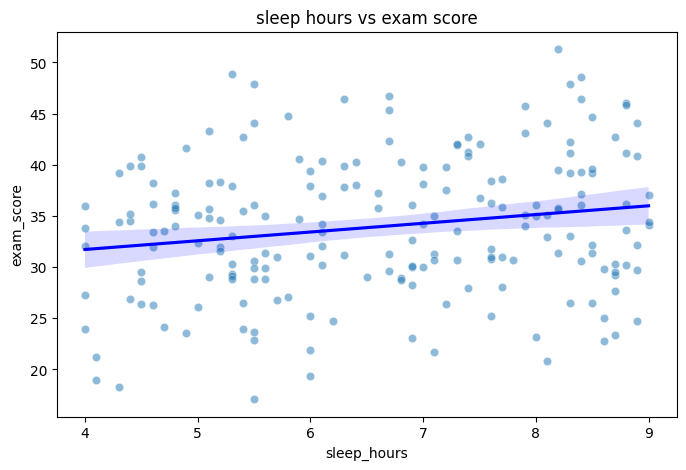

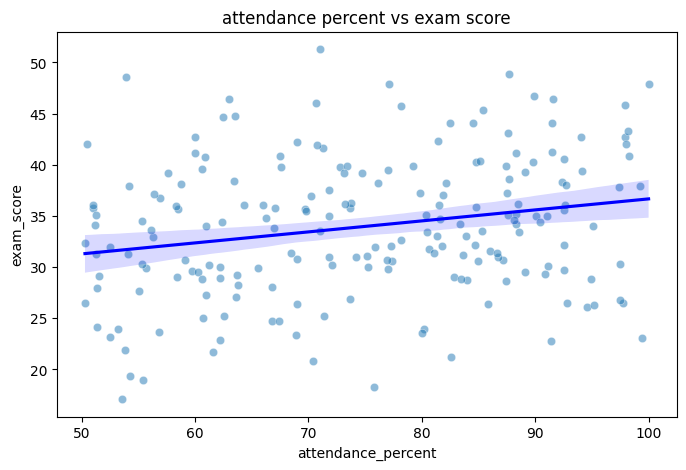

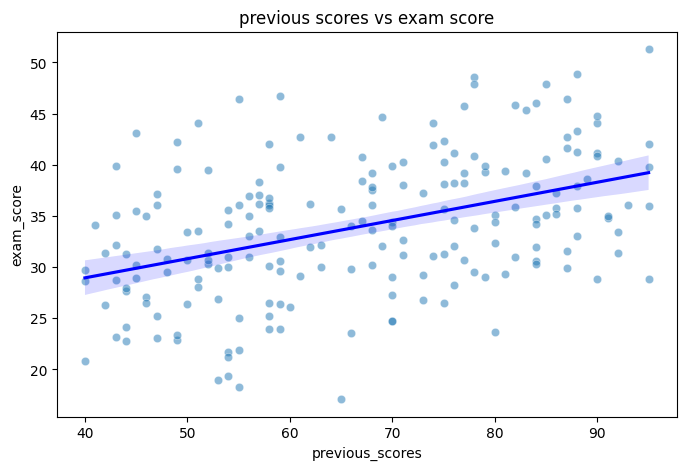

In [12]:
# Bivariate / Multivariate Analysis

# hours studied vs exam score
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=train_df,
    x='hours_studied',
    y='exam_score',
    alpha=0.5,
)
sns.regplot(data=train_df, x="hours_studied",y="exam_score", scatter=False, color="blue")
plt.title("hours studied vs exam score")
plt.show()

# sleep hours vs exam score
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=train_df,
    x='sleep_hours',
    y='exam_score',
    alpha=0.5,
)
sns.regplot(data=train_df, x="sleep_hours", y="exam_score", scatter=False, color="blue")
plt.title("sleep hours vs exam score")
plt.show()

# attendance percent vs exam score
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=train_df,
    x='attendance_percent',
    y='exam_score',
    alpha=0.5,
)
sns.regplot(data=train_df, x="attendance_percent", y="exam_score", scatter=False, color="blue")
plt.title("attendance percent vs exam score")
plt.show()

# previous scores vs exam score
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=train_df,
    x='previous_scores',
    y='exam_score',
    alpha=0.5,
)
sns.regplot(data=train_df, x="previous_scores", y="exam_score", scatter=False, color="blue")
plt.title("previous scores vs exam score")
plt.show()

# 회귀선
# 기울기가 거의 수평 -> 관계가 약함
# 기울기가 양수 -> 양의 상관관계
# 기울기가 음수 -> 음의 상관관계
# 주의
# 기울기가 크다고 해서 무조건 "관계가 깊다"는 뜻은 아님
# 실제로는 상관계수 (df.corr())로 관계 강도를 수치로 보는게 정확함
# scatter = False 하면 산점도 없이 회귀선만, True 이면 둘다 그려줌
# 근데 scatterplot 을 미리 그렸으니 False로 지정

Studied time appears to be most closely related to exam score

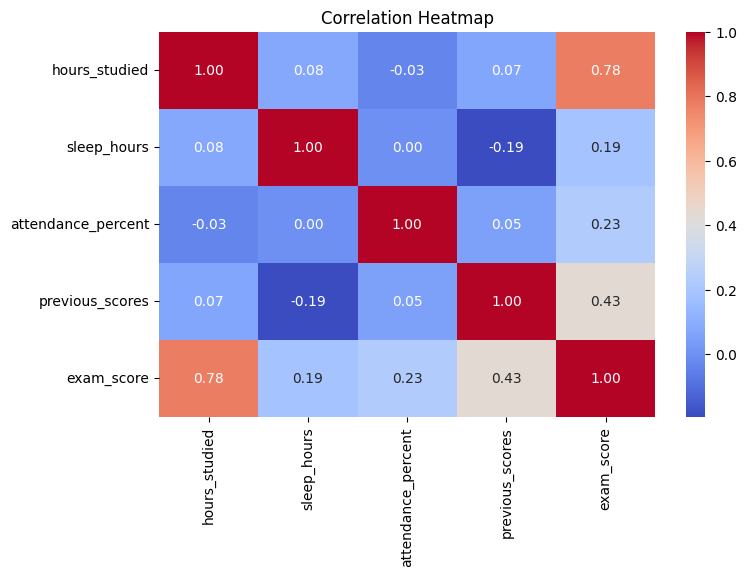

In [8]:
# Correlation Heatmap
corr = train_df[['hours_studied','sleep_hours','attendance_percent','previous_scores','exam_score']].corr()

plt.figure(figsize=(8,5))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Heatmap")
plt.show()

# Conclusion
hours_studied has the greatest impact on exam score, followed by the influence of previous_scores